In [2]:
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)

# Load the datasets
titles <- read.csv("titles.csv")
credits <- read.csv("credits.csv")


# **1. Data Analysis**

## **Task-1: Create a table that shows all action shows with an imdb_rating larger than 8.9. Show them in descending order.**


In [5]:
# Display a few rows where genres explicitly contain 'action'

titles_clean <- titles %>%
  drop_na(imdb_score)


action_high_rating_shows <- titles_clean %>%
  filter(
    str_detect(genres, "action"),  # Check if 'action' is in genres
    imdb_score > 8.9,                            # IMDB score greater than 8.9
    type == "SHOW"                               # Filter only shows
  ) %>%
  arrange(desc(imdb_score))                      # Sort by IMDB score in descending order


# Display the table
print(action_high_rating_shows)



        id                      title type
1   ts3371 Avatar: The Last Airbender SHOW
2  ts32835            Hunter x Hunter SHOW
3  ts20682            Attack on Titan SHOW
4 ts222333                     Arcane SHOW
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [6]:
action_high_rating_shows <- action_high_rating_shows %>%
  select(id, title, release_year, imdb_score, genres)

print(action_high_rating_shows)


        id                      title release_year imdb_score
1   ts3371 Avatar: The Last Airbender         2005        9.3
2  ts32835            Hunter x Hunter         2011        9.0
3  ts20682            Attack on Titan         2013        9.0
4 ts222333                     Arcane         2021        9.0
                                                          genres
1          ['scifi', 'animation', 'action', 'family', 'fantasy']
2                   ['action', 'animation', 'comedy', 'fantasy']
3 ['action', 'scifi', 'animation', 'horror', 'drama', 'fantasy']
4           ['scifi', 'action', 'drama', 'animation', 'fantasy']


## **Task-2: Pick 2 different countries that are present in the production_countries column of the titles datatable. For each chosen countries, find the 2 best rated movies according to the imdb_score column and show them in descending order. In case of ties, assign the ranks manually. Ignore any coproductions, that is any movies that have more than a single country involved in the production.**

In [7]:
# Assuming data has been loaded into a dataframe called 'titles'

# Top USA movies
top_usa_movies <- titles %>%
  filter(
    type == "MOVIE",  # Ensure it's a movie
    str_detect(production_countries, "^\\['US'\\]$"),  # Matches only movies produced solely in the USA
    !is.na(imdb_score)  # Ensure there is an IMDB score
  ) %>%
  arrange(desc(imdb_score)) %>%
  slice_head(n = 2) %>%  # Take the top 2 movies
  select(id, title, genres, production_countries, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score)

# Top GB movies
top_GB_movies <- titles %>%
  filter(
    type == "MOVIE",  # Ensure it's a movie
    str_detect(production_countries, "^\\['GB'\\]$"),  # Matches only movies produced solely in Great Britain
    !is.na(imdb_score)  # Ensure there is an IMDB score
  ) %>%
  arrange(desc(imdb_score)) %>%
  slice_head(n = 2) %>%  # Take the top 2 movies
  select(id, title, genres, production_countries, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score)


In [8]:
# Assuming data has been loaded into a dataframe called 'data'


top_usa_movies <- titles %>%
  filter(
    type == "MOVIE",  # Ensure it's a movie
    str_detect(production_countries, "^\\['US'\\]$"),  # Matches only movies produced solely in the USA
    !is.na(imdb_score)  # Ensure there is an IMDB score
  ) %>%
  arrange(desc(imdb_score)) %>%
  slice_head(n = 2)  # Take the top 2 movies


top_GB_movies <- titles %>%
  filter(
    type == "MOVIE",  # Ensure it's a movie
    str_detect(production_countries, "^\\['GB'\\]$"),  # Matches only movies produced solely in France
    !is.na(imdb_score)  # Ensure there is an IMDB score
  ) %>%
  arrange(desc(imdb_score)) %>%
  slice_head(n = 2)  # Take the top 2 movies





In [9]:
# Display the results (USA)
print(top_usa_movies)


        id        title  type
1 tm122434 Forrest Gump MOVIE
2 tm155787   GoodFellas MOVIE
                                                                                                                                                                                                                                     description
1 A man with a low IQ has accomplished great things in his life and been present during significant historic events—in each case, far exceeding what anyone imagined he could do. But despite all he has achieved, his one true love eludes him.
2                                    The true story of Henry Hill, a half-Irish, half-Sicilian Brooklyn kid who is adopted by neighbourhood gangsters at an early age and climbs the ranks of a Mafia family under the guidance of Jimmy Conway.
  release_year age_certification runtime               genres
1         1994             PG-13     142 ['drama', 'romance']
2         1990                 R     145   ['drama', 'crime']
 

In [10]:
# Display the results (GB)
print(top_GB_movies)

        id                                    title  type
1 tm853783 David Attenborough: A Life on Our Planet MOVIE
2 tm188970                  Bill Hicks: Revelations MOVIE
                                                                                                                                                                                                                                                                                                                                                                                                              description
1 The story of life on our planet by the man who has seen more of the natural world than any other. In more than 90 years, Attenborough has visited every continent on the globe, exploring the wild places of our planet and documenting the living world in all its variety and wonder. Addressing the biggest challenges facing life on our planet, the film offers a powerful message of hope for future generations.
2     

## **Task-3: Pick a movie genre. For the chosen genre, show the top 3 actors by number of appearances, sorted discerningly.**

In [11]:
# Merge titles and credits datasets
merged_data <- credits %>%
  inner_join(titles, by = "id")


In [12]:
# Filter by genre 'Comedy' and count appearances
top_actors_comedy <- merged_data %>%
  filter(type == "MOVIE", str_detect(genres, "comedy"), role == "ACTOR") %>%  # Check if 'Comedy' is in genres and role is ACTOR
  group_by(name) %>%
  summarise(appearances = n()) %>%
  arrange(desc(appearances)) %>%
  slice_head(n = 3)


print(top_actors_comedy)



# A tibble: 3 × 2
  name                appearances
  <chr>                     <int>
1 Boman Irani                  15
2 Fred Armisen                 15
3 Kareena Kapoor Khan          14


## **Task-4: For each actor, calculate their average imdb_score, and report on the top 3 best and worst actors. We will evaluate the results of this section primarily through the provided source code. So please do not spend a lot of space for this section in the written report.**

In [13]:
# Calculate average IMDB scores
actor_average_scores <- merged_data %>%
  filter(role == "ACTOR") %>%  # Filter entries where the role is ACTOR
  group_by(name) %>%
  summarise(average_imdb_score = mean(imdb_score, na.rm = TRUE))  # Calculate average, ignoring NA values


In [14]:
# Top 3 best actors based on average IMDB score
top_3_best_actors <- actor_average_scores %>%
  arrange(desc(average_imdb_score)) %>%
  slice_head(n = 3)

# Top 3 worst actors based on average IMDB score
top_3_worst_actors <- actor_average_scores %>%
  arrange(average_imdb_score) %>%
  slice_head(n = 3)

# Display the results
print("Top 3 Best Actors:")
print(top_3_best_actors)
print("Top 3 Worst Actors:")
print(top_3_worst_actors)


[1] "Top 3 Best Actors:"
# A tibble: 3 × 2
  name          average_imdb_score
  <chr>                      <dbl>
1 Anna Gunn                    9.5
2 Cricket Leigh                9.3
3 Jessie Flower                9.3
[1] "Top 3 Worst Actors:"
# A tibble: 3 × 2
  name           average_imdb_score
  <chr>                       <dbl>
1 Abeer Mohammed                1.5
2 Ana Druzhynina                1.5
3 Derrik Sweeny                 1.5


# **2. Outlier Detection and Statistical Testing**

## **Task-1: Pick two genres, and perform an analysis of their imdb scores. Check for normality and whether there any shows or movies that show up as outliers? Report your results both in text and using appropriate visualisations. Also consider if there are any other attributes in the data that you could use for a more robust analysis.**


In [15]:
# Filter entries for each genre
drama_data_imdb <- titles %>%
   filter(
    str_detect(genres, "drama"), , !is.na(imdb_score))

comedy_data_imdb <- titles %>%
  filter(str_detect(genres, "comedy"), !is.na(imdb_score))


In [16]:
# Normality test
drama_normality_imdb <- shapiro.test(drama_data_imdb$imdb_score)
comedy_normality_imdb <- shapiro.test(comedy_data_imdb$imdb_score)

# Print results
print(drama_normality_imdb)
print(comedy_normality_imdb)


	Shapiro-Wilk normality test

data:  drama_data_imdb$imdb_score
W = 0.97453, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  comedy_data_imdb$imdb_score
W = 0.98271, p-value = 9.099e-16



**IMDB Score is not normally distributed.**

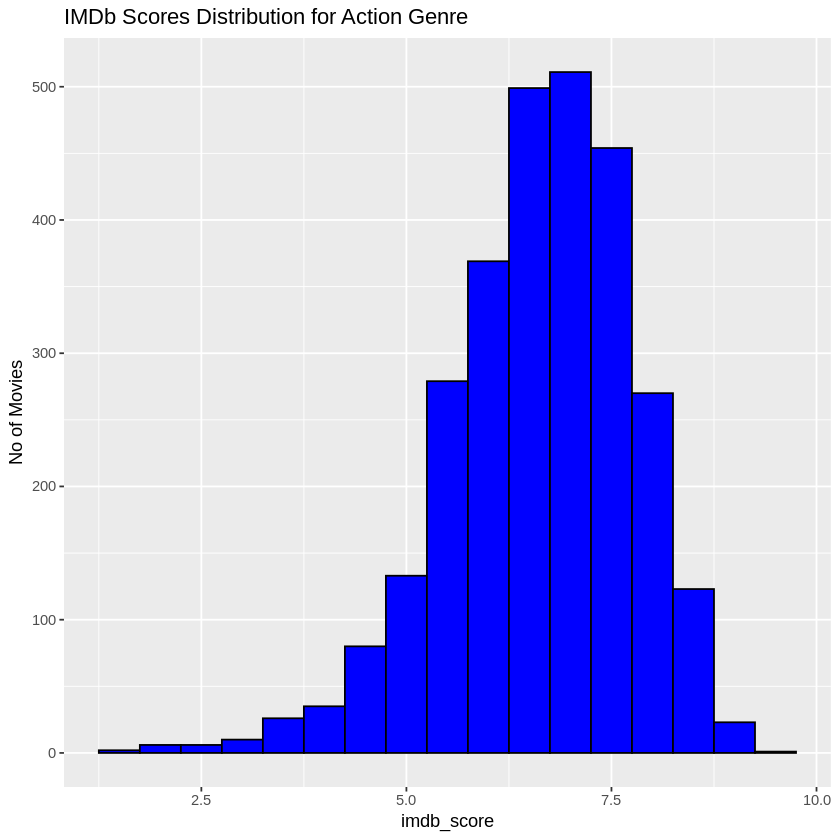

In [17]:
# Histograms and Q-Q Plots
ggplot(drama_data_imdb, aes(x = imdb_score)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  ggtitle("IMDb Scores Distribution for Action Genre") +
  labs(y = "No of Movies")

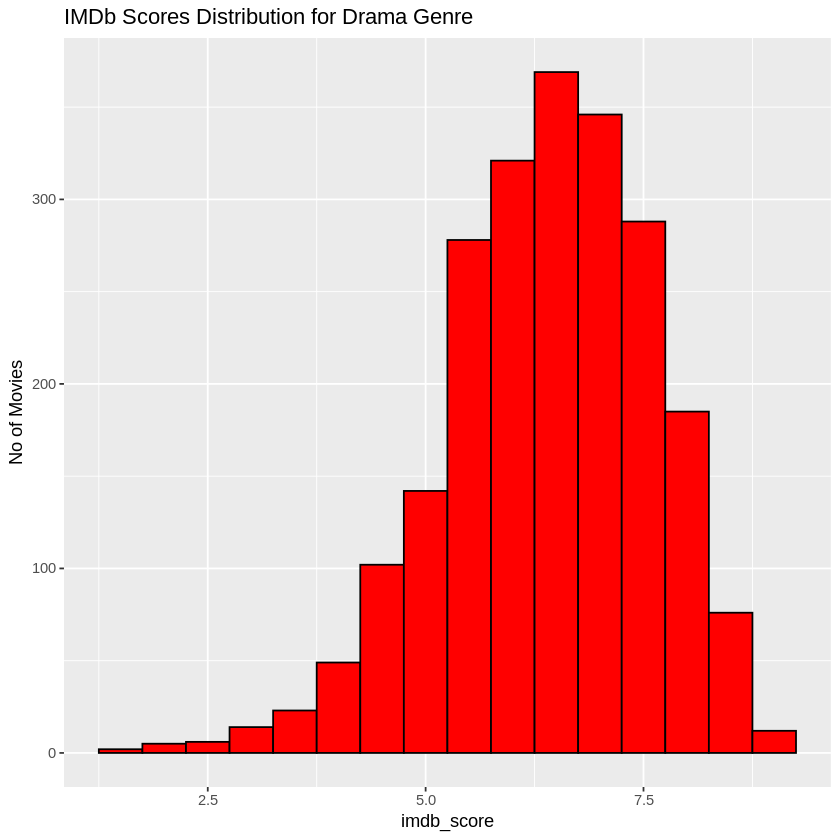

In [18]:
ggplot(comedy_data_imdb, aes(x = imdb_score)) +
  geom_histogram(binwidth = 0.5, fill = "red", color = "black") +
  ggtitle("IMDb Scores Distribution for Drama Genre") +
  labs(y = "No of Movies")

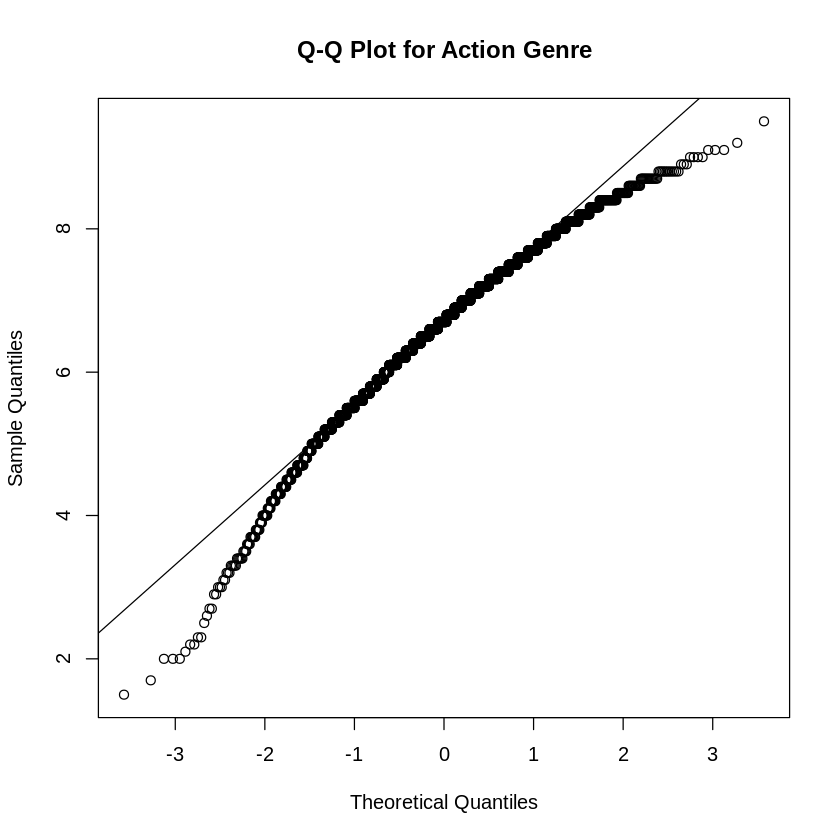

In [19]:
qqnorm(drama_data_imdb$imdb_score, main = "Q-Q Plot for Action Genre")
qqline(drama_data_imdb$imdb_score)

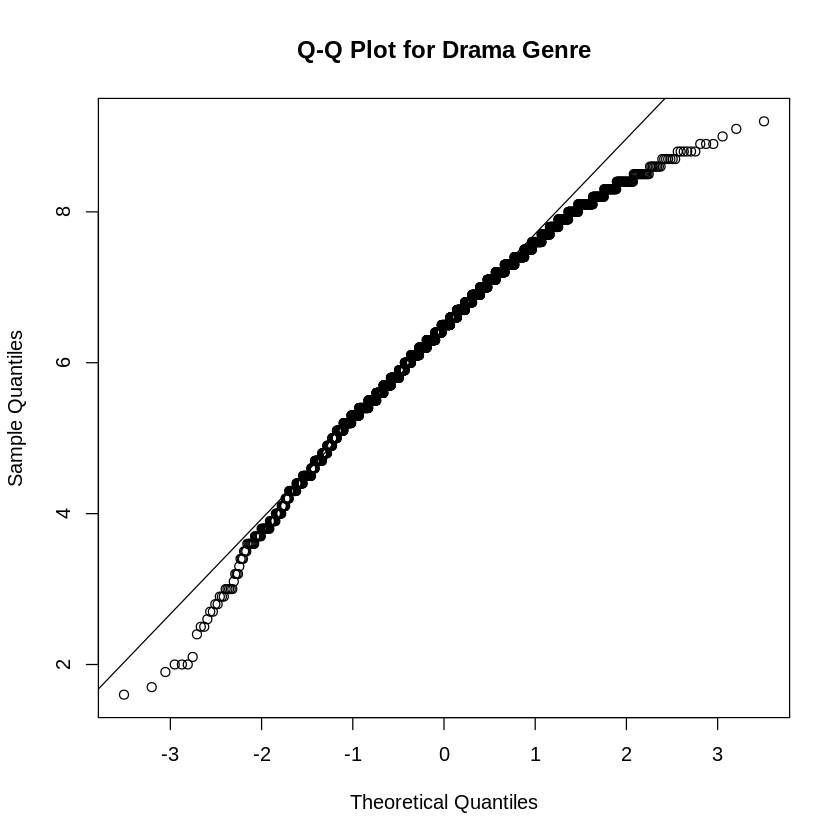

In [20]:
qqnorm(comedy_data_imdb$imdb_score, main = "Q-Q Plot for Drama Genre")
qqline(comedy_data_imdb$imdb_score)

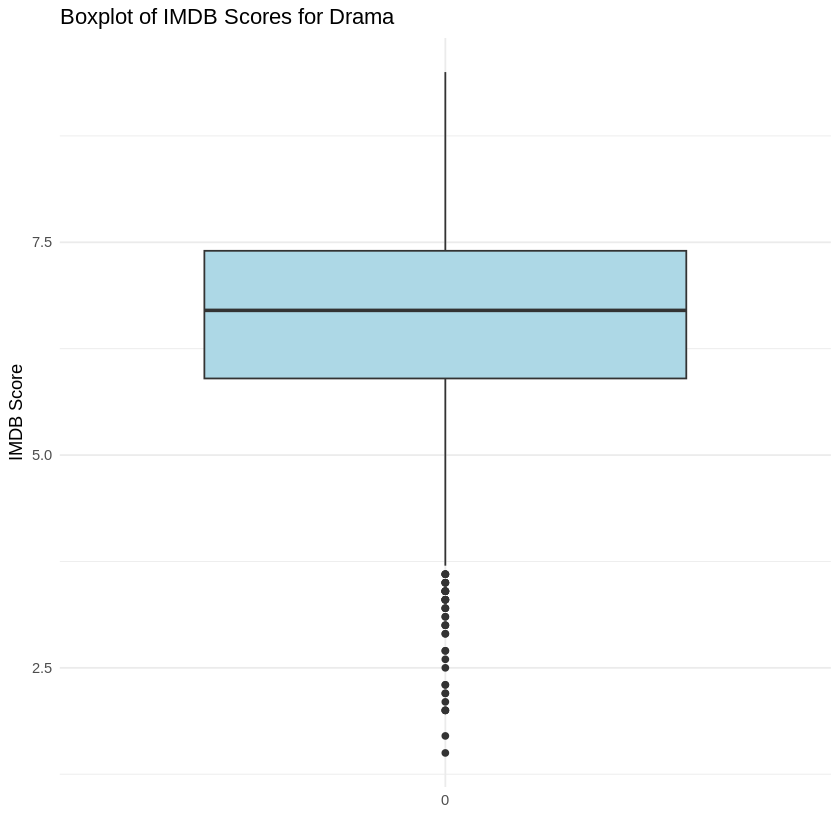

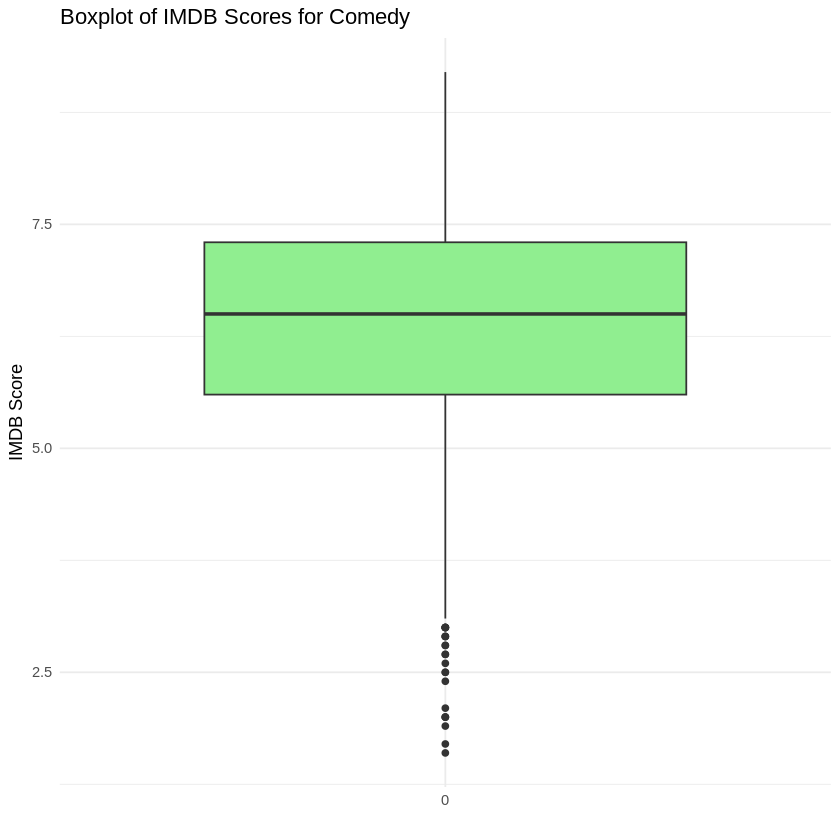

In [21]:
# Boxplot for Drama genre
ggplot(drama_data_imdb, aes(x = factor(0), y = imdb_score)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot of IMDB Scores for Drama",
       x = "",
       y = "IMDB Score") +
  theme_minimal()

# Boxplot for Comedy genre
ggplot(comedy_data_imdb, aes(x = factor(0), y = imdb_score)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Boxplot of IMDB Scores for Comedy",
       x = "",
       y = "IMDB Score") +
  theme_minimal()


In [22]:
# Function to detect outliers based on IQR and return full rows
detect_outliers_with_titles <- function(data) {
  q1 <- quantile(data$imdb_score, 0.25)
  q3 <- quantile(data$imdb_score, 0.75)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 1.5 * iqr
  outliers <- data[data$imdb_score < lower_bound | data$imdb_score > upper_bound, ]
  return(outliers)
}

# Identify outliers in Drama and Comedy
drama_outliers_imdb <- detect_outliers_with_titles(drama_data_imdb)
comedy_outliers_imdb <- detect_outliers_with_titles(comedy_data_imdb)

# Print outliers with titles and scores
print("Drama Outliers")
print(drama_outliers_imdb[, c("title", "imdb_score")])
print("Comedy Outliers")
print(comedy_outliers_imdb[, c("title", "imdb_score")])


[1] "Drama Outliers"
                                 title imdb_score
9                              Dostana        2.1
311                             Agyaat        2.9
318               Main Aurr Mrs Khanna        3.4
340                  Mission Istaanbul        3.4
600                         Himmatwala        1.7
852                          Shaandaar        3.6
889            Those who fear are dead        3.6
898                            Aerials        1.5
904                Santa Banta Pvt Ltd        2.7
922        Hajwala: The Missing Engine        2.0
1162                      Bonus Family        2.9
1223        Day of the Dead: Bloodline        3.4
1300               An Imperfect Murder        3.2
1369                            SPF-18        3.2
1380                   Nothing to Lose        2.3
1490                 A House of Blocks        2.3
1511                         Frat Star        3.6
1528                      B. A. Pass 2        2.2
1631                         

## **Task-2: Try doing the same analysis, but using the tmdb scores instead. Is there a difference between the two websites? Confirm this by choosing an appropriate statistical test to determine if there is a statistically significant difference between their distributions? Remember to remove outliers if the statistical test you are using is affected by them.**

In [23]:
# Filter entries for each genre
drama_data_tmdb <- titles %>%
   filter(
    str_detect(genres, "drama"), !is.na(tmdb_score))

comedy_data_tmdb <- titles %>%
  filter(str_detect(genres, "comedy"), !is.na(tmdb_score))


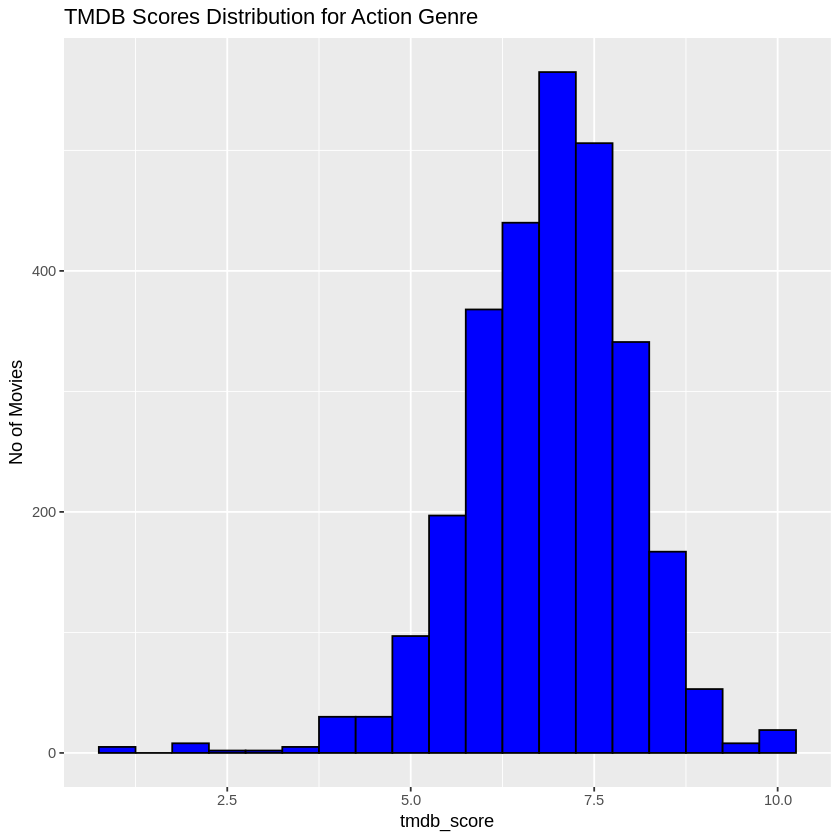

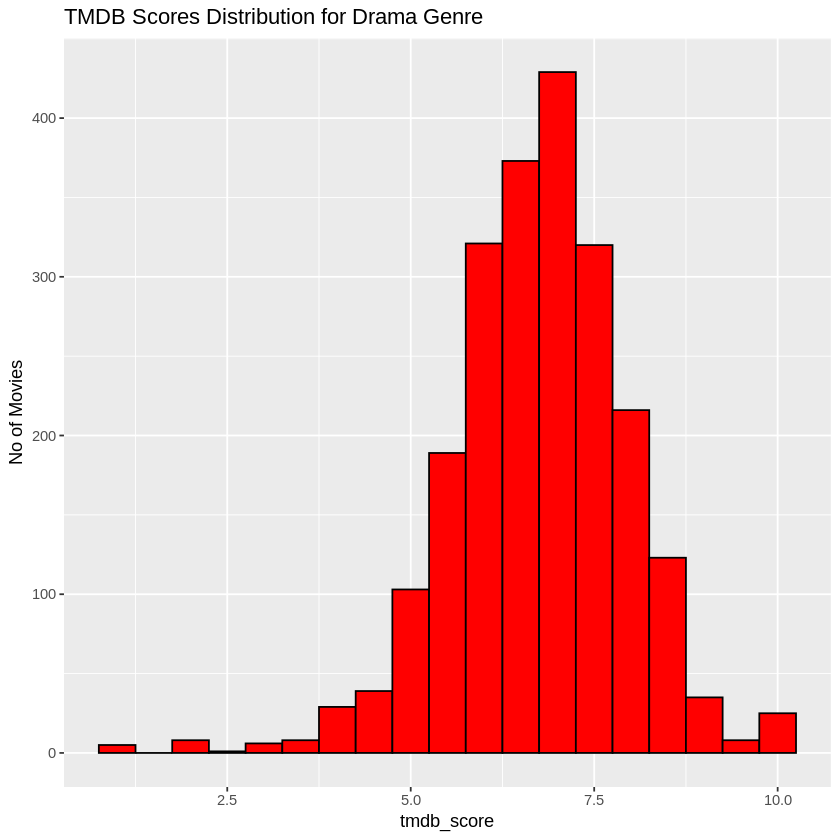

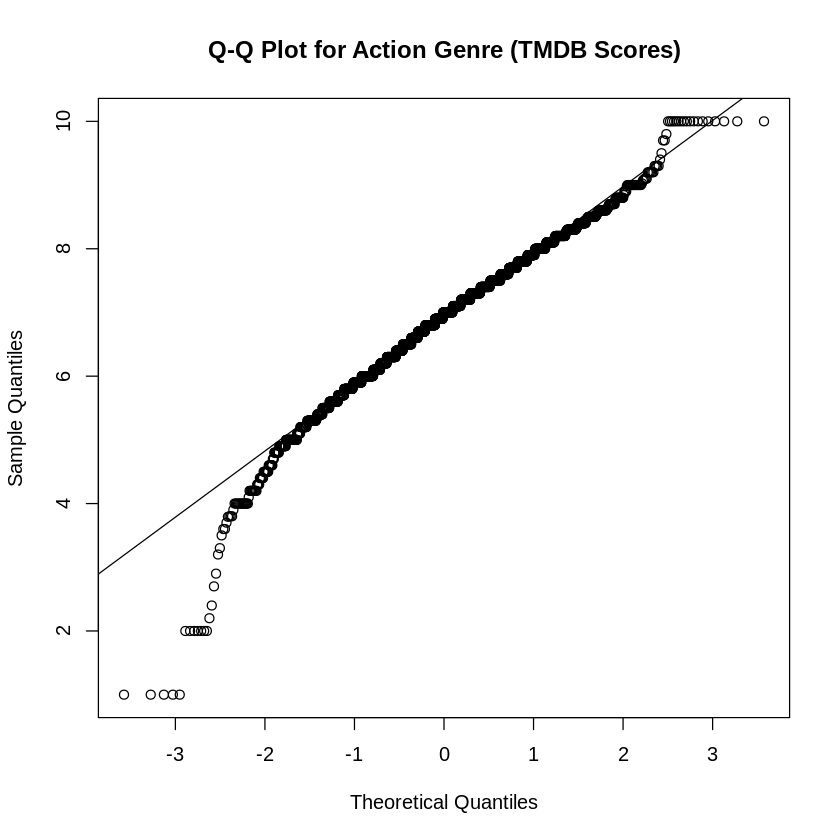

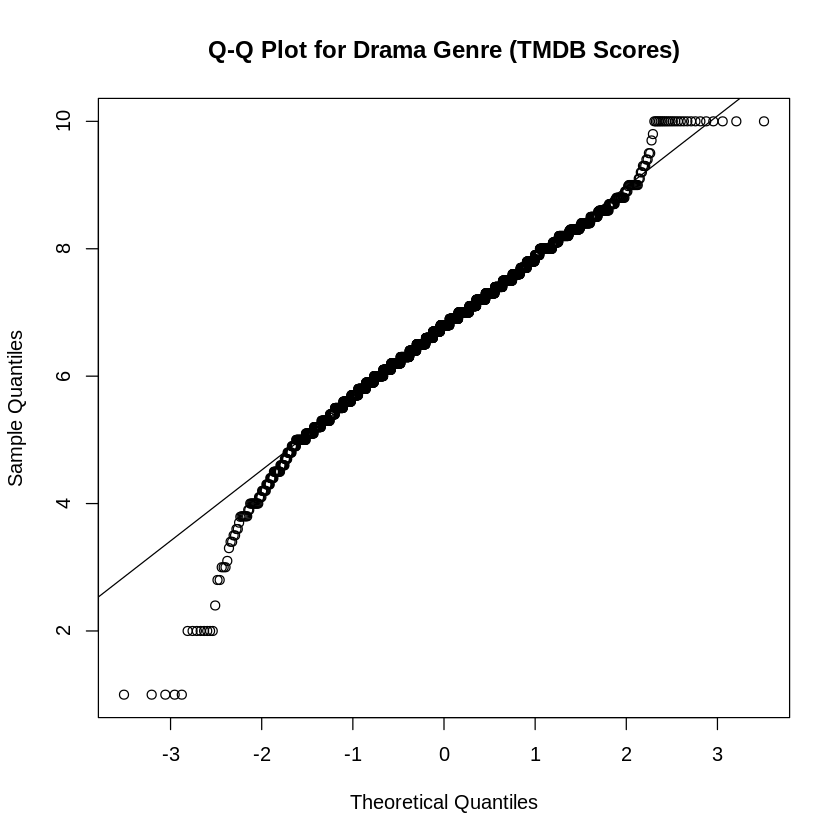

In [24]:
# Histograms and Q-Q Plots
ggplot(drama_data_tmdb, aes(x = tmdb_score)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  ggtitle("TMDB Scores Distribution for Action Genre") +
  labs(y = "No of Movies")

ggplot(comedy_data_tmdb, aes(x = tmdb_score)) +
  geom_histogram(binwidth = 0.5, fill = "red", color = "black") +
  ggtitle("TMDB Scores Distribution for Drama Genre") +
  labs(y = "No of Movies")

# Q-Q Plots for TMDB Scores
qqnorm(drama_data_tmdb$tmdb_score, main = "Q-Q Plot for Action Genre (TMDB Scores)")
qqline(drama_data_tmdb$tmdb_score)

qqnorm(comedy_data_tmdb$tmdb_score, main = "Q-Q Plot for Drama Genre (TMDB Scores)")
qqline(comedy_data_tmdb$tmdb_score)

In [25]:
# Normality test
drama_normality_tmdb <- shapiro.test(drama_data_tmdb$tmdb_score)
comedy_normality_tmdb <- shapiro.test(comedy_data_tmdb$tmdb_score)

# Print results
print(drama_normality_tmdb)
print(comedy_normality_tmdb)


	Shapiro-Wilk normality test

data:  drama_data_tmdb$tmdb_score
W = 0.97329, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  comedy_data_tmdb$tmdb_score
W = 0.97605, p-value < 2.2e-16



**TMDB Score is not normally distributed.**

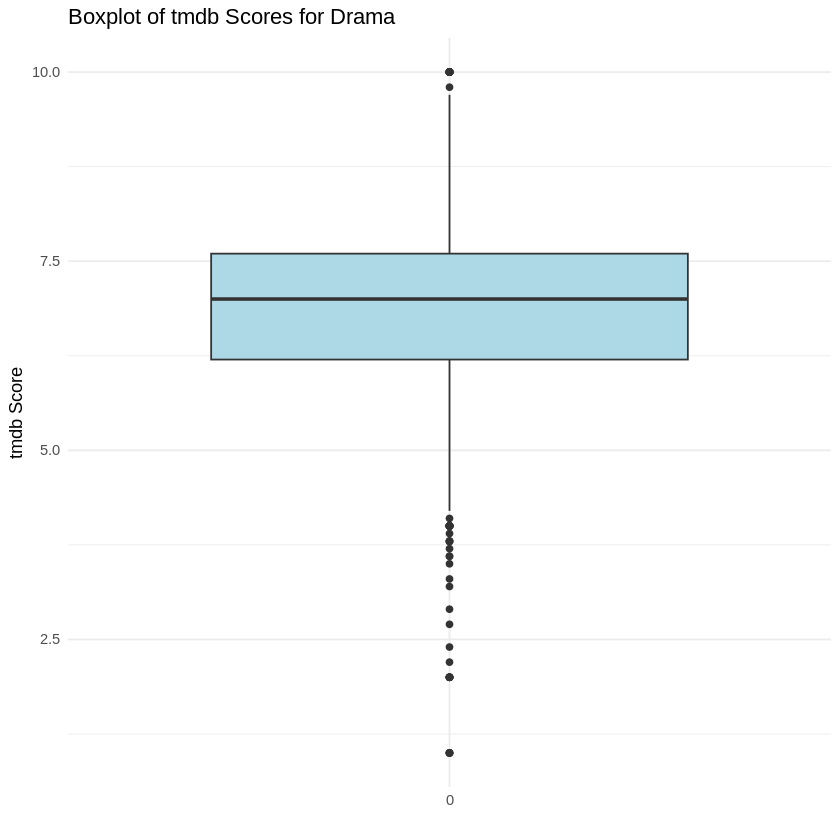

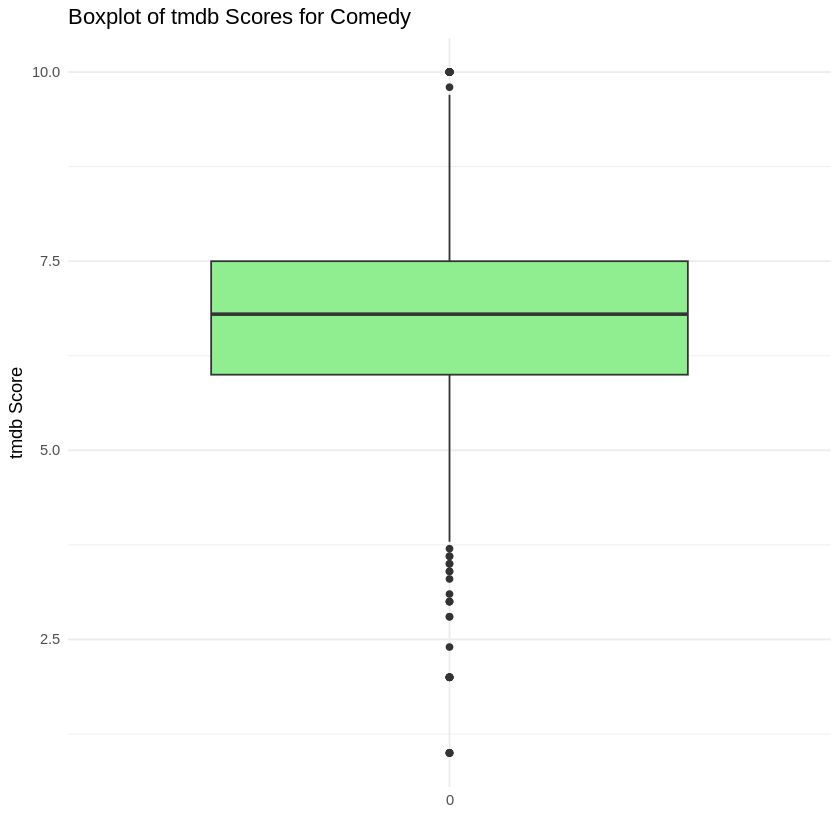

In [26]:
# Boxplot for Drama genre
ggplot(drama_data_tmdb, aes(x = factor(0), y = tmdb_score)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot of tmdb Scores for Drama",
       x = "",
       y = "tmdb Score") +
  theme_minimal()

# Boxplot for Comedy genre
ggplot(comedy_data_tmdb, aes(x = factor(0), y = tmdb_score)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Boxplot of tmdb Scores for Comedy",
       x = "",
       y = "tmdb Score") +
  theme_minimal()


In [27]:
detect_outliers_with_titles <- function(data) {
  q1 <- quantile(data$tmdb_score, 0.25)
  q3 <- quantile(data$tmdb_score, 0.75)
  iqr <- q3 - q1
  lower_bound <- q1 - 1.5 * iqr
  upper_bound <- q3 + 1.5 * iqr
  outliers <- data[data$tmdb_score < lower_bound | data$tmdb_score > upper_bound, ]
  return(outliers)
}

# Identify outliers in Drama and Comedy
drama_outliers_tmdb <- detect_outliers_with_titles(drama_data_tmdb)
comedy_outliers_tmdb <- detect_outliers_with_titles(comedy_data_tmdb)

# Print outliers with titles and scores
print("Drama Outliers")
print(drama_outliers_tmdb[, c("title", "tmdb_score")])
print("Comedy Outliers")
print(comedy_outliers_tmdb[, c("title", "tmdb_score")])


[1] "Drama Outliers"
                                      title tmdb_score
118                       Govindha Govindha      4.000
153                    Apocalypse Now Redux      9.800
250                               Te quiero      2.000
308                                  Agyaat      4.100
314                    Main Aurr Mrs Khanna      3.900
326                            The Hospital      2.200
332                               Pink Zone     10.000
335                       Mission Istaanbul      3.200
401                             Inborn Pair      1.000
436                              Ragini MMS      3.800
453                          No Other Woman      4.000
547                           Dharmakshetra     10.000
570           The Amazing Praybeyt Benjamin      3.500
581                               Heritages      4.000
588                              Himmatwala      3.300
727                       The Haunted House     10.000
872                 Those who fear are dead 

Warning message:
“Removed 121 rows containing non-finite outside the scale range (`stat_bin()`).”


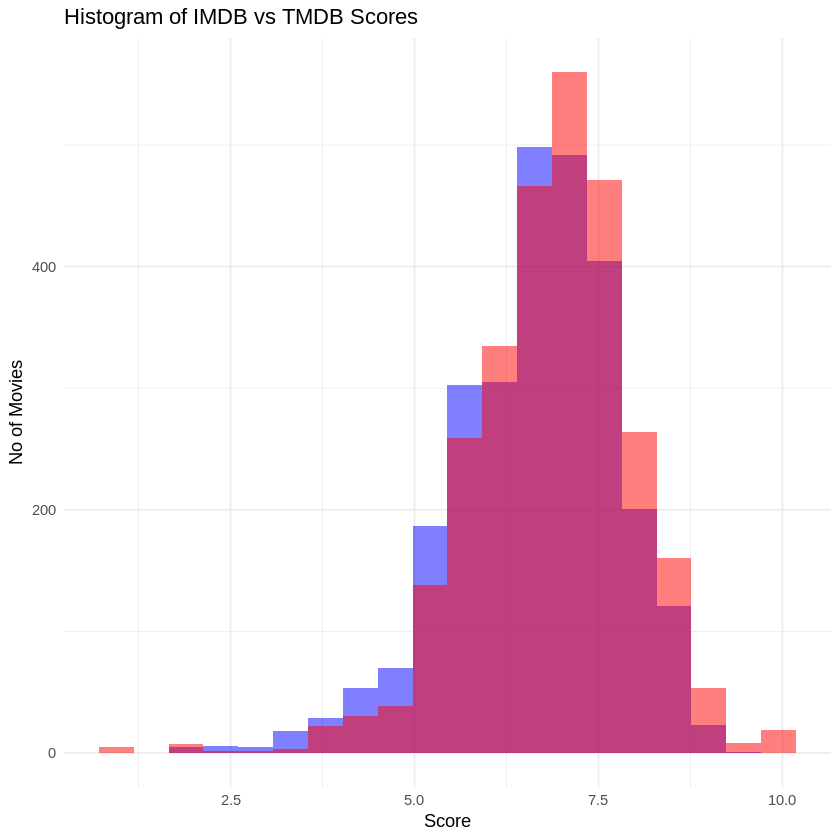

In [28]:
# Histograms
ggplot(drama_data_tmdb, aes(x = imdb_score)) +
  geom_histogram(bins = 20, fill = "blue", alpha = 0.5) +
  geom_histogram(aes(x = tmdb_score), bins = 20, fill = "red", alpha = 0.5) +
  labs(title = "Histogram of IMDB vs TMDB Scores",
       x = "Score",
       y = "Count") +
  labs(y = "No of Movies") +
  theme_minimal()



In [29]:
drama_data <- titles %>%
   filter(
    str_detect(genres, "drama"), !is.na(tmdb_score), !is.na(imdb_score))

comedy_data <- titles %>%
  filter(str_detect(genres, "comedy"), !is.na(tmdb_score), !is.na(imdb_score))
# Function to remove outliers
remove_outliers <- function(data, score_column) {
  Q1 <- quantile(data[[score_column]], 0.25)
  Q3 <- quantile(data[[score_column]], 0.75)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  data %>%
    filter(data[[score_column]] >= lower_bound & data[[score_column]] <= upper_bound)
}

# Remove outliers for Action and Drama genres (TMDB Scores)
drama_cleaned_tmdb <- remove_outliers(drama_data, "tmdb_score")
comedy_cleaned_tmdb <- remove_outliers(comedy_data, "tmdb_score")
drama_cleaned_tmdb_imdb <- remove_outliers(drama_cleaned_tmdb, "imdb_score")
comedy_cleaned_tmdb_imdb <- remove_outliers(comedy_data, "imdb_score")

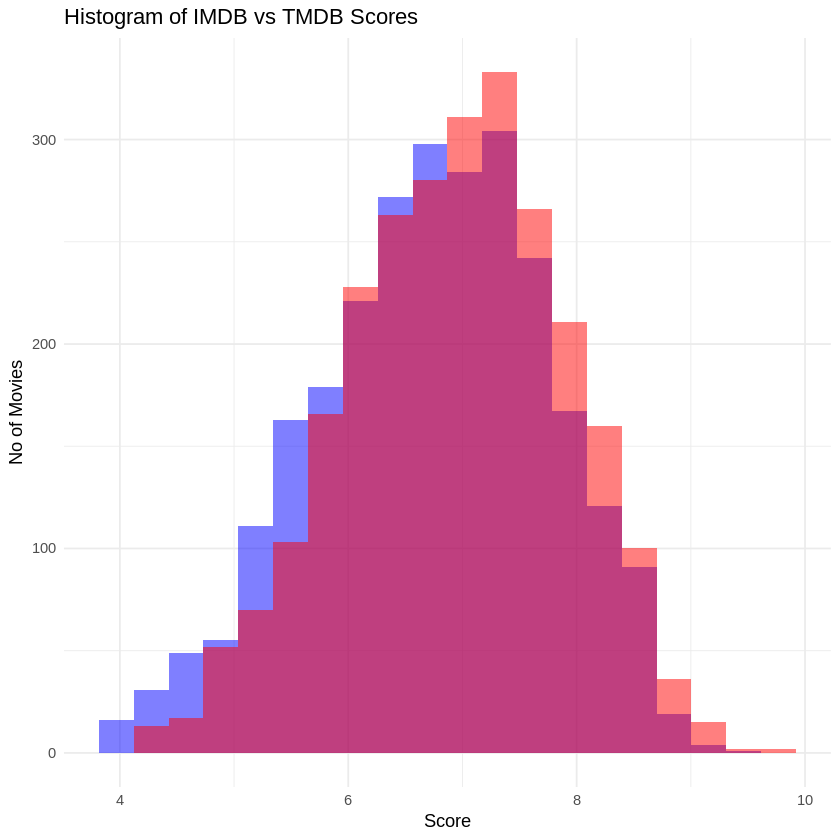

In [30]:
# Histograms and boxplots
ggplot(drama_cleaned_tmdb_imdb, aes(x = imdb_score)) +
  geom_histogram(bins = 20, fill = "blue", alpha = 0.5) +
  geom_histogram(aes(x = tmdb_score), bins = 20, fill = "red", alpha = 0.5) +
  labs(title = "Histogram of IMDB vs TMDB Scores",
       x = "Score",
       y = "Count") +
  labs(y = "No of Movies") +
  theme_minimal()

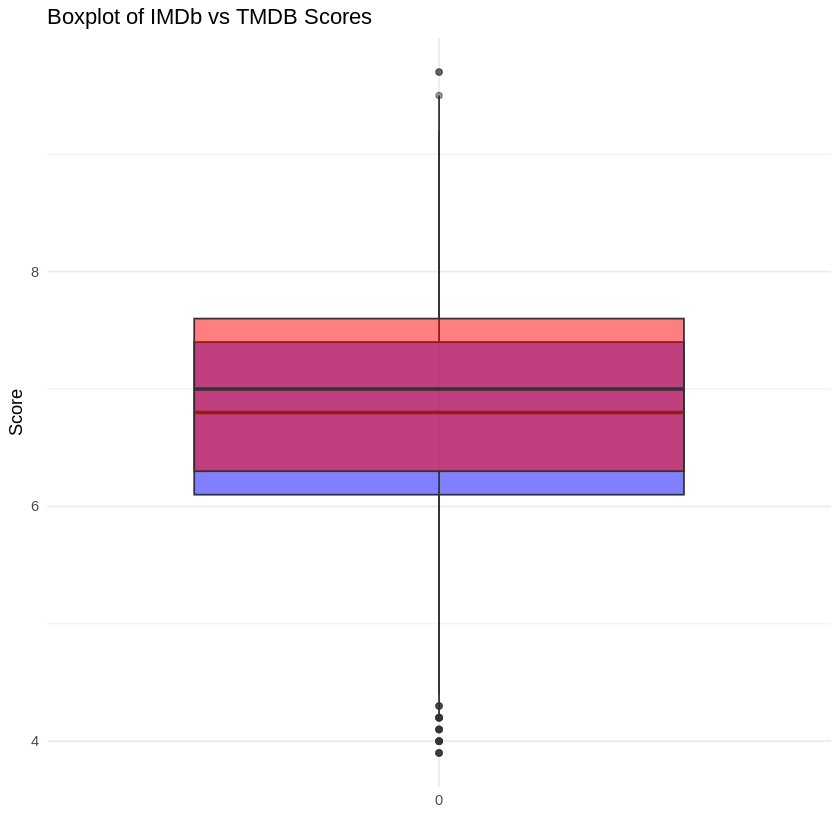

In [31]:

ggplot(drama_cleaned_tmdb_imdb, aes(x = factor(0), imdb_score)) +
  geom_boxplot(fill = "blue", alpha = 0.5) +
  geom_boxplot(aes(y = tmdb_score), fill = "red", alpha = 0.5) +
  labs(title = "Boxplot of IMDb vs TMDB Scores",
       x = "",
       y = "Score") +
  theme_minimal()


# # Boxplot for Action Genre (IMDb vs. TMDB Scores)
# ggplot(action_combined, aes(x = "IMDb", y = imdb_score)) +
#   geom_boxplot(fill = "blue") +
#   geom_boxplot(aes(x = "TMDB", y = tmdb_score), fill = "red") +
#   ggtitle("Comparison of IMDb and TMDB Scores for Action Genre")

# # Boxplot for Drama Genre (IMDb vs. TMDB Scores)
# ggplot(drama_combined, aes(x = "IMDb", y = imdb_score)) +
#   geom_boxplot(fill = "blue") +
#   geom_boxplot(aes(x = "TMDB", y = tmdb_score), fill = "red") +
#   ggtitle("Comparison of IMDb and TMDB Scores for Drama Genre")

## **Task-3: Finally, perform your own outlier analysis using the data for the actors. Feel free to examine the data in any way you think is appropriate, and report on any interesting findings.**

In [32]:
actor_data <- merged_data %>%
  group_by(name) %>%
  summarise(
    num_appearances = n(),
    avg_imdb_score = mean(imdb_score)
  ) %>%
  arrange(desc(num_appearances))

actor_data_cleaned <- actor_data %>%
  filter(!is.na(avg_imdb_score))

In [33]:
# Function to detect outliers
detect_outliers <- function(data, column) {
  Q1 <- quantile(data[[column]], 0.25)
  Q3 <- quantile(data[[column]], 0.75)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  data %>%
    filter(data[[column]] < lower_bound | data[[column]] > upper_bound)
}

# Detect outliers in number of appearances
appearance_outliers <- detect_outliers(actor_data_cleaned, "num_appearances")

In [34]:
# Detect outliers in average IMDb score
score_outliers <- detect_outliers(actor_data_cleaned, "avg_imdb_score")

In [35]:
# Display top outliers in number of appearances
appearance_outliers %>%
  arrange(desc(num_appearances)) %>%
  head(10)

name,num_appearances,avg_imdb_score
<chr>,<int>,<dbl>
Boman Irani,25,6.436000
Kareena Kapoor Khan,25,6.284000
Amitabh Bachchan,20,6.590000
Paresh Rawal,20,6.580000
Priyanka Chopra Jonas,20,6.615000
Raúl Campos,20,6.090000
Aamir Khan,19,7.636842
Anupam Kher,19,6.052632
Jan Suter,19,6.057895


In [36]:
# Display top outliers in average IMDb score
score_outliers %>%
  arrange(desc(avg_imdb_score)) %>%
  head(10)

name,num_appearances,avg_imdb_score
<chr>,<int>,<dbl>
Anna Gunn,1,9.50
D.C. Young Fly,2,3.65
Grant S. Johnson,2,3.60
Joey Bragg,2,3.60
Paola Minaccioni,2,3.60
Turlough Convery,2,3.60
Abeer Sabry,1,3.60
Ahmed Safwat,1,3.60
Ahmed Taha,1,3.60


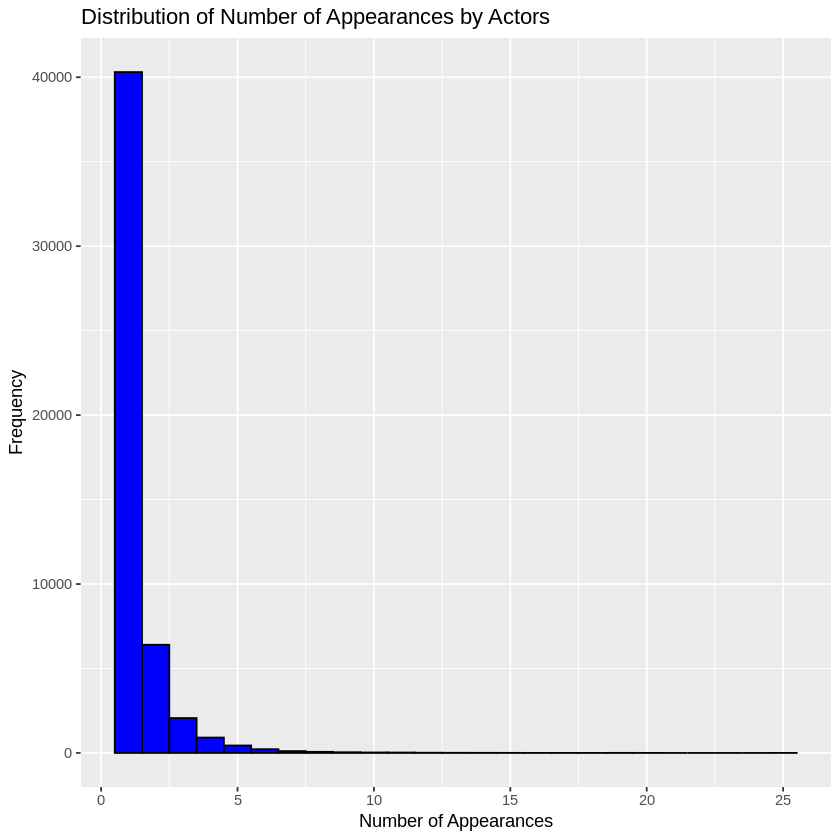

In [37]:
ggplot(actor_data_cleaned, aes(x = num_appearances)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  ggtitle("Distribution of Number of Appearances by Actors") +
  xlab("Number of Appearances") +
  ylab("Frequency")

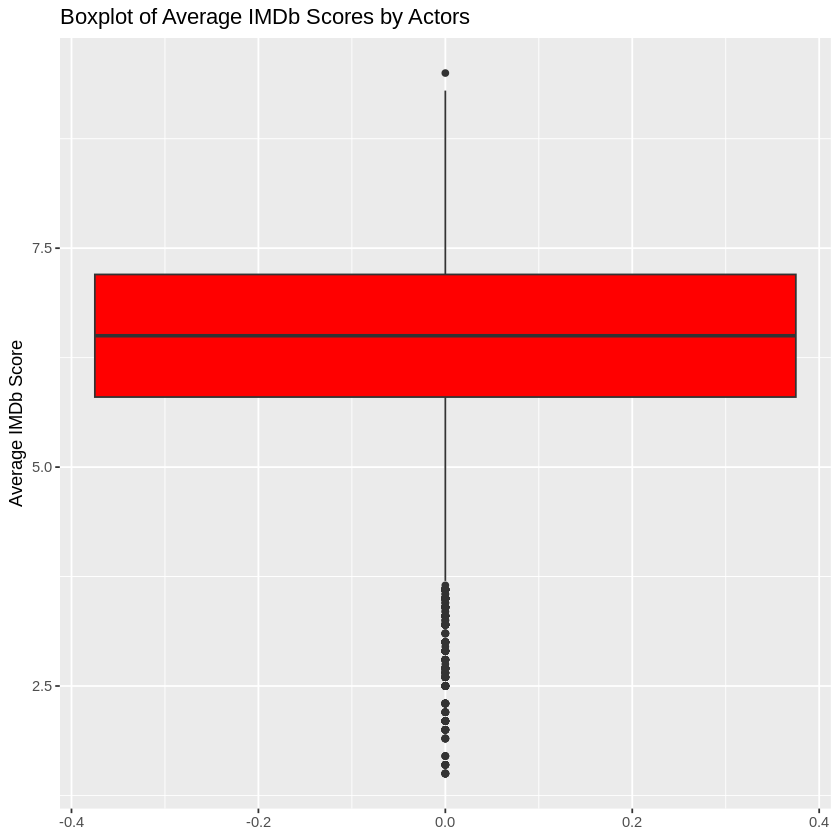

In [38]:
ggplot(actor_data_cleaned, aes(y = avg_imdb_score)) +
  geom_boxplot(fill = "red") +
  ggtitle("Boxplot of Average IMDb Scores by Actors") +
  ylab("Average IMDb Score")

## **Task-4: For all the tasks in this part, try to also consider real-life context. For example, do the results of your analysis match with what you would expect given the data? Can you find explanations for the outliers?**


### 1. Distribution of IMDB and TMDB Scores

*Expectation:*
- Most movies and TV shows will have scores close to the average (like 5-8 out of 10). Only a few will get really high (9+) or really low (below 3) scores. Popular or critically acclaimed movies should have higher ratings, while poorly received ones will have lower ratings.

*Real-life Example:*

1. A high-rated movie like The Shawshank Redemption (IMDB score: 9.3) is an
outlier because it’s a universally loved classic.
2. A low-rated movie like Disaster Movie (IMDB score: 2.0) is an outlier because it was widely criticized as one of the worst films ever made.

### 2. Outliers in IMDB and TMDB Scores
*Expectation:*
1. Outliers happen when movies or shows are extremely well-received or heavily criticized.
- High outliers might be due to strong performances, storytelling, or fan followings.
- Low outliers could result from poor execution, niche audiences, or controversy.

*Real-life Example:*

1. A high outlier like Avengers: Endgame (IMDB: 8.4, TMDB: 8.3) reflects its massive popularity and box-office success.
2. A low outlier like Cats (2019) (IMDB: 2.8, TMDB: 3.2) reflects how bad CGI and critical reviews led to terrible ratings.

### 3. Difference Between IMDB and TMDB Scores
*Expectation:*
- IMDB and TMDB scores might differ because the audiences are different. IMDB has more general users, while TMDB could have more movie enthusiasts. IMDB scores might be more spread out because casual users tend to give extreme ratings (10 for favorites, 1 for disliked ones).

*Real-life Example:*

1. Joker (2019): IMDB score: 8.4, TMDB score: 8.3. Both scores are high because it was a critically and commercially successful movie.
2. Birdemic: Shock and Terror (IMDB: 1.8, TMDB: 2.1): The scores are low on both platforms, but slightly higher on TMDB because niche movie enthusiasts might appreciate it as a "so bad it’s good" cult classic.


### 4. Actors and Outliers
*Expectation:*

- Actors with many appearances are usually well-known and work regularly in films and TV.
Actors with very high average scores may consistently choose quality projects, while actors with low average scores might act in niche or low-rated films.

*Real-life Example:*

1. High number of appearances: Samuel L. Jackson has appeared in over 150 films, making him an outlier in terms of appearances.
2. High average IMDB score: Daniel Day-Lewis, known for being selective with his roles, has an average IMDB score above 8 for most of his movies.
3. Low average IMDB score: Some actors known for B-grade or poorly reviewed films might have low averages, like Uwe Boll's frequent collaborators.

### 5. Cultural or Contextual Influences
*Expectation:*
- Cultural and contextual factors might affect ratings. Some genres, like Comedy, may have more mixed ratings because humor is subjective. Similarly, movies from non-English-speaking countries may have niche appeal but lower scores due to fewer reviews.

*Real-life Example:*

1. Parasite (2019): Despite being a non-English movie, it became a global hit, scoring 8.5 on IMDB, showing how quality transcends language barriers.
2. A niche Bollywood comedy might score high on TMDB (where specific fans rate it) but lower on IMDB due to a lack of international appeal.

### 6. Outliers and Their Context
*Expectation:*
- Outliers may have specific reasons for their extreme ratings, such as controversy, poor execution, or cult status. It’s important to consider the story behind the outliers to make sense of the data.

*Real-life Example:*

1. High Outlier: The Godfather (1972) with an IMDB score of 9.2 is universally regarded as one of the best films ever.
2. Low Outlier: Battlefield Earth (2000) with an IMDB score of 2.5 was a box-office disaster and heavily criticized for poor acting and plot.